<a href="https://colab.research.google.com/github/Keifiek/AluraStore/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [2]:
import pandas as pd
import matplotlib.pyplot as plt


url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)
tiendas = [tienda1, tienda2, tienda3, tienda4]
tienda1.head()
tienda1


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359
...,...,...,...,...,...,...,...,...,...,...,...,...
2354,Iphone 15,Electrónicos,1284400.0,66600.0,15/11/2021,Izabela de León,Medellín,1,Nequi,1,6.25184,-75.56359
2355,Impresora,Electrónicos,282800.0,15300.0,18/03/2023,Lucas Olivera,Bogotá,5,Nequi,1,4.60971,-74.08175
2356,Juego de mesa,Juguetes,122900.0,7200.0,06/07/2021,Lucas Olivera,Cali,5,Tarjeta de crédito,4,3.43722,-76.52250
2357,Cama box,Muebles,691300.0,35000.0,02/05/2022,Pedro Gomez,Pasto,1,Tarjeta de crédito,2,1.21361,-77.28111


#1. Análisis de facturación



In [3]:
costos = []
for tienda in tiendas:
  costos.append(sum(tienda.iloc[:,2]))
print(costos)
peor_factura = costos.index(min(costos))
print (f"La tienda que tiene la peor facturacion es la tienda numero: {peor_factura+1}")
factura_total = sum(costos)

[1150880400.0, 1116343500.0, 1098019600.0, 1038375700.0]
La tienda que tiene la peor facturacion es la tienda numero: 4


In [4]:
tiendas[0][["Categoría del Producto",'Precio']]

,Categoría del Producto,Precio
0,Electrónicos,164300.0
1,Muebles,192300.0
2,Juguetes,209600.0
3,Electrodomésticos,757500.0
4,Muebles,335200.0
...,...,...
2354,Electrónicos,1284400.0
2355,Electrónicos,282800.0
2356,Juguetes,122900.0
2357,Muebles,691300.0


[26.13487560413943, 25.35059116828267, 24.934481164947233, 23.580052062630664]


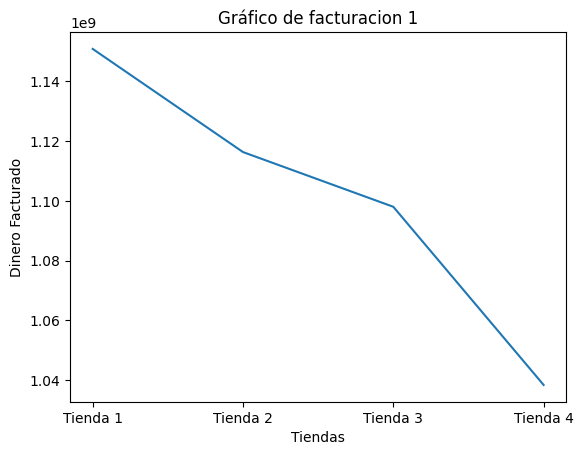

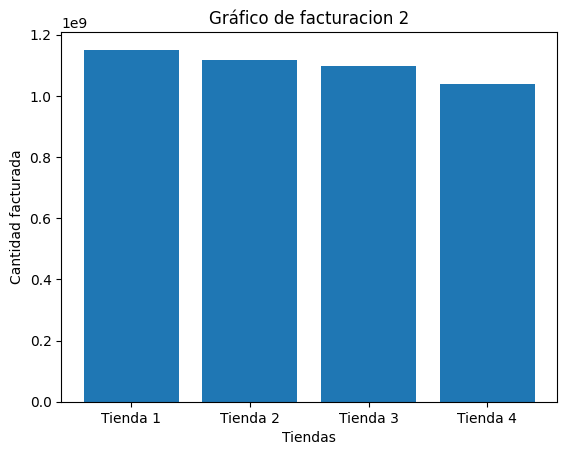

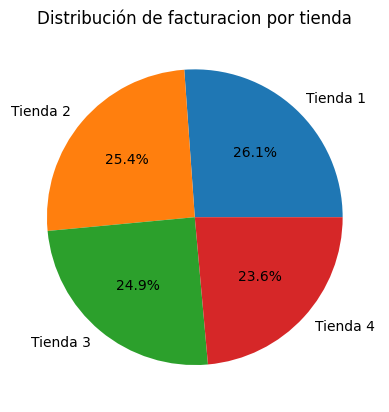

In [13]:
tiendas_numero = ["Tienda 1","Tienda 2","Tienda 3","Tienda 4"]
porcentajes = []
for costo in costos:
  porcentajes.append((costo * 100)/factura_total)
print(porcentajes)
#Grafica de linea
plt.plot(tiendas_numero, costos)
plt.title("Gráfico de facturacion 1")
plt.xlabel("Tiendas")
plt.ylabel("Dinero Facturado")
plt.show()

#Grafica de barras
plt.bar(tiendas_numero, costos)
plt.title("Gráfico de facturacion 2")
plt.xlabel("Tiendas")
plt.ylabel("Cantidad facturada")
plt.show()

#Grafica de PAstel
plt.pie(porcentajes, labels=tiendas_numero, autopct="%1.1f%%")
plt.title("Distribución de facturacion por tienda")
plt.show()



# 2. Ventas por categoría

In [6]:
ventas_categoria = []
for tienda in tiendas:
  ventas_categoria.append(tienda.groupby("Categoría del Producto")['Cantidad de cuotas'].sum())
print (f"Tiendas:\n{ventas_categoria}\n")


Tiendas:
[Categoría del Producto
Artículos para el hogar     489
Deportes y diversión        796
Electrodomésticos           906
Electrónicos               1341
Instrumentos musicales      573
Juguetes                    872
Libros                      520
Muebles                    1446
Name: Cantidad de cuotas, dtype: int64, Categoría del Producto
Artículos para el hogar     493
Deportes y diversión        720
Electrodomésticos           890
Electrónicos               1333
Instrumentos musicales      659
Juguetes                    876
Libros                      611
Muebles                    1265
Name: Cantidad de cuotas, dtype: int64, Categoría del Producto
Artículos para el hogar     542
Deportes y diversión        873
Electrodomésticos           882
Electrónicos               1262
Instrumentos musicales      580
Juguetes                    937
Libros                      517
Muebles                    1408
Name: Cantidad de cuotas, dtype: int64, Categoría del Producto
Artículos 

In [18]:
popular_tienda = []
for venta in ventas_categoria:
  categoria_top = venta.idxmax()
  monto_top = venta.max()
  popular_tienda.append((categoria_top,monto_top))
  print(f"Tienda: Categoría más popular -> {categoria_top}: {monto_top} productos vendidos")
print(popular_tienda)

Tienda: Categoría más popular -> Muebles: 1446 productos vendidos
Tienda: Categoría más popular -> Electrónicos: 1333 productos vendidos
Tienda: Categoría más popular -> Muebles: 1408 productos vendidos
Tienda: Categoría más popular -> Muebles: 1392 productos vendidos
[('Muebles', 1446), ('Electrónicos', 1333), ('Muebles', 1408), ('Muebles', 1392)]


('Muebles', 'Electrónicos', 'Muebles', 'Muebles')


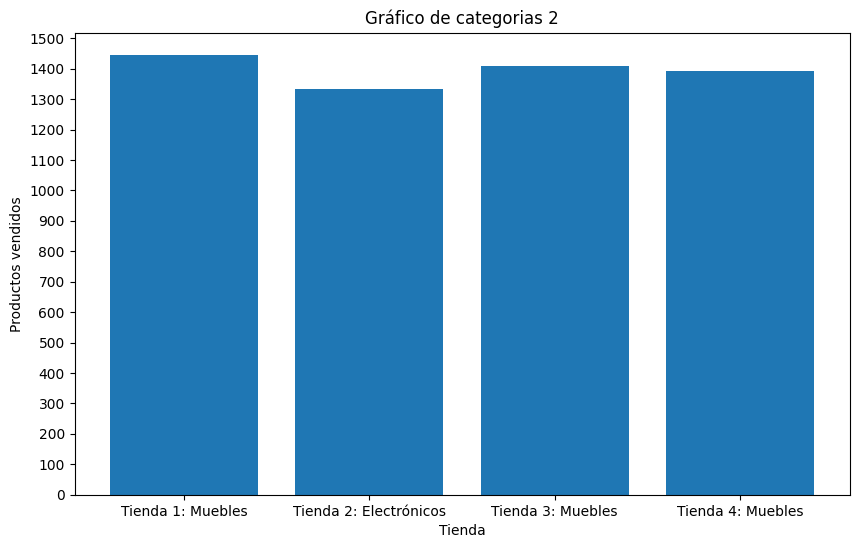

In [24]:
categorias, cantidades = zip(*popular_tienda)
#Grafica de barras+
print(categorias)
categorias_formateadas = []
for i, categoria in enumerate(categorias, start = 1):
  categorias_formateadas.append(f"Tienda {i}: {categoria}")
plt.figure(figsize=(10, 6))
max_y = max(cantidades)
plt.yticks(range(0, max_y + 100, 100))
plt.bar(categorias_formateadas, cantidades)
plt.title("Gráfico de categorias 2")
plt.xlabel(f"Tienda")
plt.ylabel("Productos vendidos")
plt.show()


# 3. Calificación promedio de la tienda


In [8]:
calificaciones_prom_tienda = []
for tienda in tiendas:
  calificaion = sum(tienda.iloc[:,7])/len(tienda)
  calificaciones_prom_tienda.append(calificaion)
print(calificaciones_prom_tienda)

[3.976685036032217, 4.037303942348453, 4.048325561678677, 3.9957591178965224]


In [9]:
mejor = 0
for i, calificacion in enumerate(calificaciones_prom_tienda, start=1):
  print(f"\nLa Calificacion promedio de la Tienda {i} es de: {calificacion}")
  if (calificacion > mejor):
    mejor = calificacion


La Calificacion promedio de la Tienda 1 es de: 3.976685036032217

La Calificacion promedio de la Tienda 2 es de: 4.037303942348453

La Calificacion promedio de la Tienda 3 es de: 4.048325561678677

La Calificacion promedio de la Tienda 4 es de: 3.9957591178965224


La tienda con mejor calificacion es la tienda numero 3 


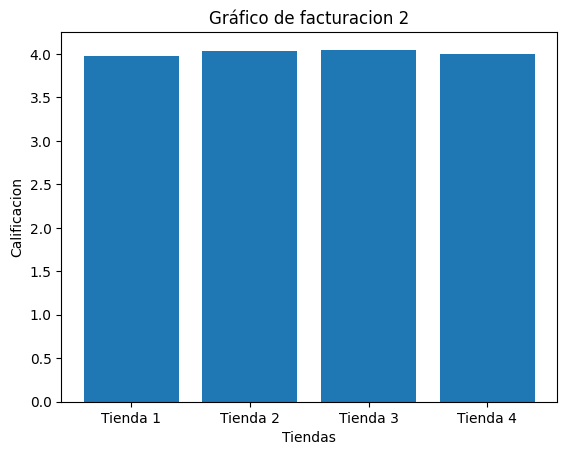

In [30]:
print (f"La tienda con mejor calificacion es la tienda numero {calificaciones_prom_tienda.index(mejor)+1} ")
plt.bar(tiendas_numero, calificaciones_prom_tienda)
plt.title("Gráfico de facturacion 2")
plt.xlabel("Tiendas")
plt.ylabel("Calificacion")

plt.show()

# 4. Productos más y menos vendidos

In [11]:
productos_menos_vendidos = []
productos_mas_vendidos = []
for tienda in tiendas:
  productos_menos_vendidos.append(tienda[tienda["Cantidad de cuotas"] == 1]["Producto"].tolist())
  productos_mas_vendidos.append(tienda[tienda["Cantidad de cuotas"] >= 4]["Producto"].tolist())
for producto in productos_menos_vendidos:
  print(f"{producto}\n")
print("---------------------------------------------------------------------------------------------------------------------------------")
for producto in productos_mas_vendidos:
  print(f"{producto}\n")

['Juego de mesa', 'Microondas', 'Silla de oficina', 'Bloques de construcción', 'Muñeca bebé', 'Carrito de control remoto', 'Lavavajillas', 'Balón de voleibol', 'Microondas', 'Cubertería', 'Set de ollas', 'Carrito de control remoto', 'Estufa', 'Vaso térmico', 'Vaso térmico', 'Cama box', 'Auriculares', 'Dinosaurio Rex', 'Bicicleta', 'Set de ollas', 'Secadora de ropa', 'Tablet ABXY', 'Kit de bancas', 'Impresora', 'Batería', 'Cubo mágico 8x8', 'Set de vasos', 'Tablet ABXY', 'Auriculares', 'Silla de oficina', 'Modelado predictivo', 'Mesa de noche', 'Iphone 15', 'Secadora de ropa', 'Estufa', 'Mochila', 'Balón de baloncesto', 'Mesa de noche', 'Auriculares con micrófono', 'Auriculares', 'Carrito de control remoto', 'Iphone 15', 'Juego de mesa', 'Set de vasos', 'Silla de oficina', 'Impresora', 'Microondas', 'Olla de presión', 'Cuerda para saltar', 'Muñeca bebé', 'Dashboards con Power BI', 'Celular ABXY', 'Secadora de ropa', 'Sillón', 'Bicicleta', 'Vaso térmico', 'TV LED UHD 4K', 'Microondas', '

# 5. Envío promedio por tienda

In [34]:
promedios_envio = []
envios = []
for tienda in tiendas:
  promedios_envio.append(sum(tienda.iloc[:,3])/len(tienda))
  envios.append(sum(tienda.iloc[:,3]))
for i, promedio in enumerate (promedios_envio, start=1):
    print(f"El promedio de costos de envio para la Tienda numero {i} es de: {promedio}")

El promedio de costos de envio para la Tienda numero 1 es de: 26018.60958033065
El promedio de costos de envio para la Tienda numero 2 es de: 25216.235693090293
El promedio de costos de envio para la Tienda numero 3 es de: 24805.680373039424
El promedio de costos de envio para la Tienda numero 4 es de: 23459.457167090754


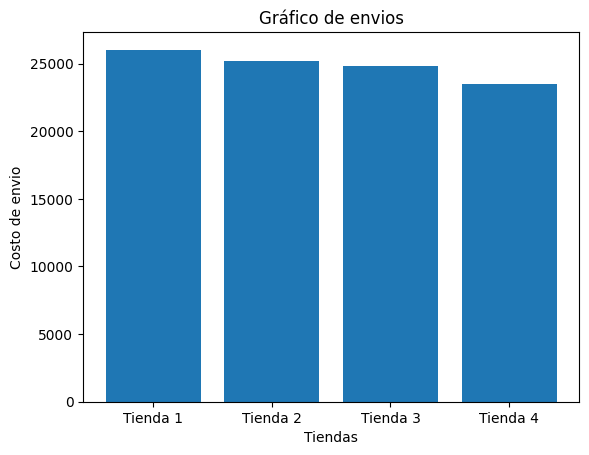

[1089502500.0, 1056858400.0, 1039503000.0, 983058300.0]


In [35]:
plt.bar(tiendas_numero, promedios_envio)
plt.title("Gráfico de envios")
plt.xlabel("Tiendas")
plt.ylabel("Costo de envio")
plt.show()

ganancia = []
for i, costo in enumerate(costos, start=0):
  ganancia.append(costo-envios[i])
print (ganancia)

#Reporte de analisis de datos

##Introduccion
El objetivo principal de este analisis es descubrir cual de las cuatro tiendas es la que esta siendo menos efectiva y es posible presindir de la misma.
Para lograr llegar a esta conclusion hemos realizado un analis de diferentes aspectos de cada una de las tiendas. De esta manera poder tomar la decision mas objetiva y con menor riesgo posible.
###Aspectos analizados
* Los ingresos totales de las tiendas.
* Las categorías de productos más y menos vendidas.
* Las calificaciones promedio de los clientes por tienda.
* Los productos más y menos vendidos.
* El coste de envío promedio para cada tienda.

###Resultado de los ingresos totales
Despues de analizar las 4 tiendas se observo que la tienda numero 1 fue la que genera una factura mayor y la tienda numero 4 ha sido la que genera la menor factura.
###Resultado de las categorias mas populares
El analisis muestra que la categoria mas vendida en la mayoria de las tiendas es la de muebles, esto con una relacion de 3 a 1, siendo este 1 de la tienda numero 2 con la categoria de electronicos.
###Resultado de las calificaciones promedio por tienda
La tienda con peor calificacion es la tienda numero 1 y la tienda con la mejor calificacion es la numero 3.
###Resultado de productos mas y menos vendidos
Es complicado analizar tantos productos, mas sin embargo lo que podemos deducir es que la tienda numero 3 tiene la mayor cantidad de productos mas vendidos y la tienda numero 4 tiene la mayor cantidad de productos pocos vendidos.
###Resultado de costes de envio
La tienda que gasta mas dinero en promedio en envios es la tienda numero 1 y la tienda que menos gasta en promedio es la tienda numero 4.

##Conclusion
En base a los datos observados se puede realizar una recomendacion sobre que tienda se debe de vender. La tienda que genera menos beneficios en este momento es la numero 4, incluso si generamos la diferencia entre las facturas totales y los costos de envio, podemos concluir que la tienda numero 4 genera la menor cantidad de dinero.
De igual manera es la tienda con productos menos vendidos, esto a pesar de tener la categoria mas popular al igual que la tienda que mas dinero genera. Por estas razones se recomendaria vender la tienda numero 4.
